### Portfolio Analysis

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
whale = Path("whale_returns.csv")
algo = Path("algo_returns.csv")
sp = Path("sp500_history.csv")

whale_df = pd.read_csv(whale, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df = pd.read_csv(sp, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [4]:
display(whale_df.head())
display(algo_df.head())
sp_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [5]:
df= pd.concat([algo_df, sp_df,whale_df], axis = 1, join = 'inner')
df.head()

,Algo 1,Algo 2,Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-02,-0.008158,0.003200,$2117.39,NaN,NaN,NaN,NaN
2015-03-03,-0.001942,-0.000949,$2107.78,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,$2098.53,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,$2101.04,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,$2071.26,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
#Removing null values
df.dropna(inplace=True)
#checking if there are nulls
df.isnull().sum()


Algo 1                         0
Algo 2                         0
Close                          0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
#Replacing the $ with blank
df["Close"] = df['Close'].replace('[\$]', '',regex=True).astype(float)
df.head()

,Algo 1,Algo 2,Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,2107.78,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,2098.53,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,2101.04,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,2071.26,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,2079.43,0.000582,0.004225,0.005843,-0.001652


In [8]:
df.rename(columns = {'Close':'S&P500'}, inplace=True)
df.head()

,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,2107.78,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,2098.53,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,2101.04,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,2071.26,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,2079.43,0.000582,0.004225,0.005843,-0.001652


<AxesSubplot: xlabel='Date'>

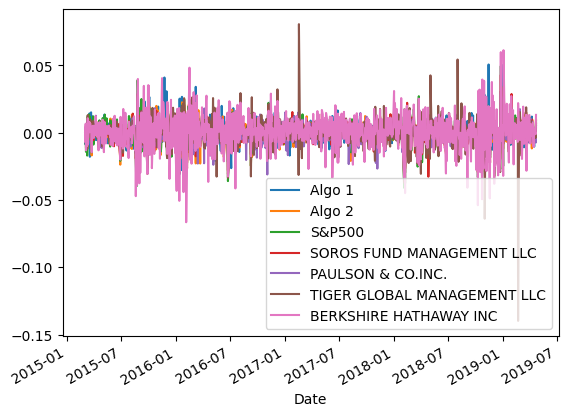

In [9]:
# Calculate daily returns for 'Close' column
sp_return = df['S&P500'] = df['S&P500'].pct_change()
# Plot daily returns of all portfolios
df.plot()

In [10]:
df.isnull().sum()

Algo 1                         0
Algo 2                         0
S&P500                         1
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

Algo 1                         0
Algo 2                         0
S&P500                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1042 entries, 2015-03-04 to 2019-04-23
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Algo 1                       1042 non-null   float64
 1   Algo 2                       1042 non-null   float64
 2   S&P500                       1042 non-null   float64
 3   SOROS FUND MANAGEMENT LLC    1042 non-null   float64
 4   PAULSON & CO.INC.            1042 non-null   float64
 5   TIGER GLOBAL MANAGEMENT LLC  1042 non-null   float64
 6   BERKSHIRE HATHAWAY INC       1042 non-null   float64
dtypes: float64(7)
memory usage: 65.1 KB


In [13]:
df.head()

,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-04,-0.008589,0.002416,-0.004389,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,0.001196,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,0.003944,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.001392,-0.012155,-0.016961,-0.010263,-0.005341,-0.012079,-0.009739


In [14]:
daily_returns = df.pct_change()
daily_returns

,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,-0.888803,0.789231,-1.272547,0.800968,0.257544,-1.929234,0.596558
2015-03-06,4.190043,-3.650914,-12.850368,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,0.098917,-1.113716,-1.278290,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-0.744524,-10.327163,-5.300052,-18.625495,-2.263954,-3.067380,4.893672
...,...,...,...,...,...,...,...
2019-04-16,0.603391,-1.634218,-1.809253,-2.898341,-1.335693,-3.088322,-1.079744
2019-04-17,0.483294,-2.803170,-5.463942,-2.073108,-17.661104,4.306537,2.851033
2019-04-18,-0.942926,-0.764890,-1.694469,-1.499843,-1.188925,-1.131886,-0.405345


<AxesSubplot: xlabel='Date'>

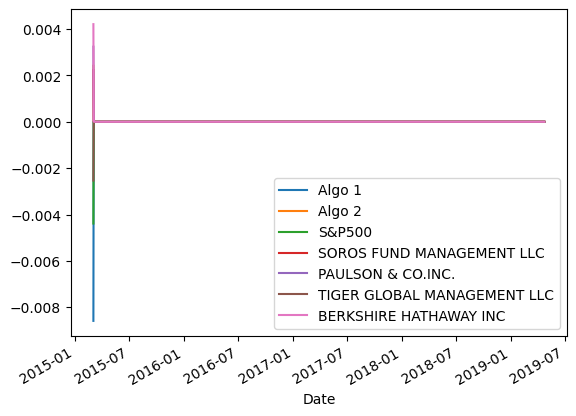

In [15]:
# Calculate cumulative returns of all portfolios
cumulative_return = df.cumprod()
cumulative_return
# Plot cumulative returns
cumulative_return.plot()

In [16]:
cumulative_return.head()

,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-04,-8.588804e-03,2.416211e-03,-4.388504e-03,2.229913e-03,3.241280e-03,-2.533977e-03,4.213019e-03
2015-03-05,8.202724e-06,1.044567e-05,-5.248981e-06,8.955332e-06,1.321163e-05,-5.966646e-06,2.833816e-05
2015-03-06,-4.065879e-08,-1.197107e-07,7.439870e-08,-7.079510e-08,-4.721881e-08,5.060416e-08,-3.711749e-07
2015-03-09,2.214705e-10,-1.560095e-10,2.934626e-10,-4.122255e-11,-1.995188e-10,2.956667e-10,6.133499e-10
2015-03-10,-3.081964e-13,1.896351e-12,-4.977531e-12,4.230657e-13,1.065575e-12,-3.571404e-12,-5.973432e-12


In [17]:
cumulative_return.isnull().sum()

Algo 1                         0
Algo 2                         0
S&P500                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio

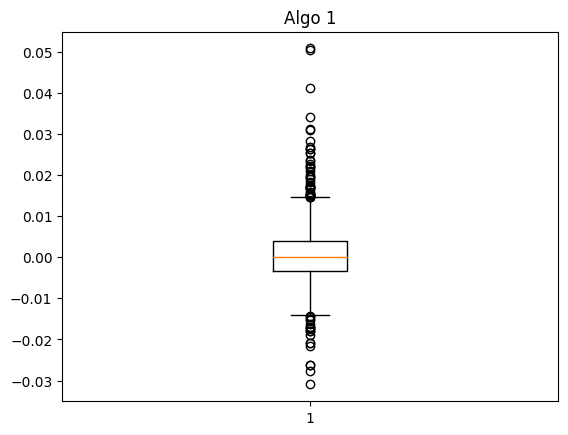

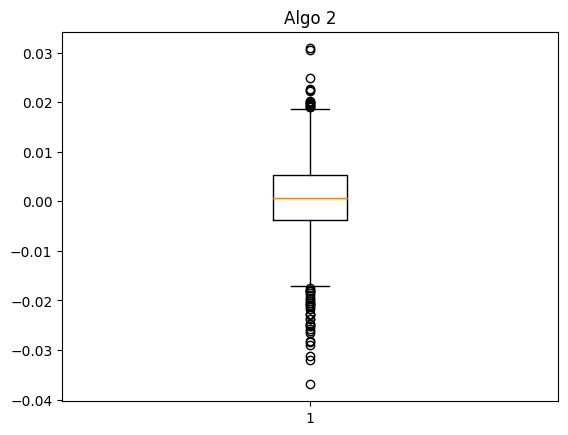

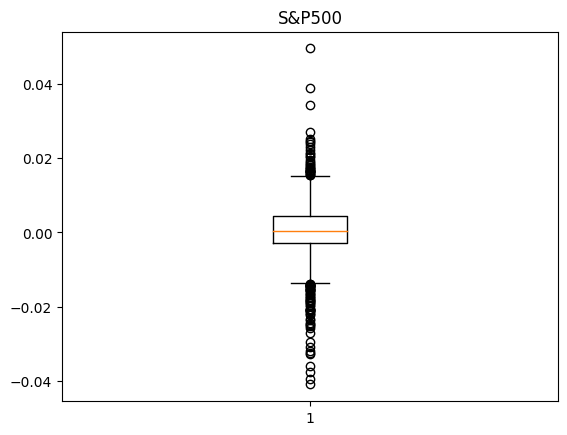

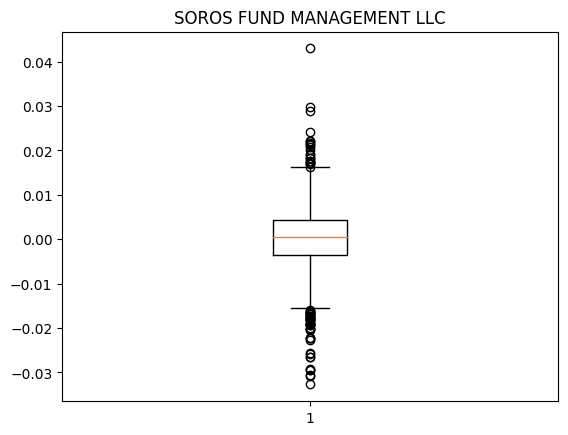

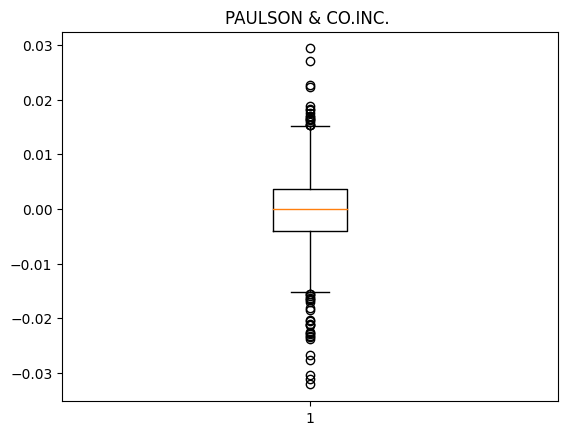

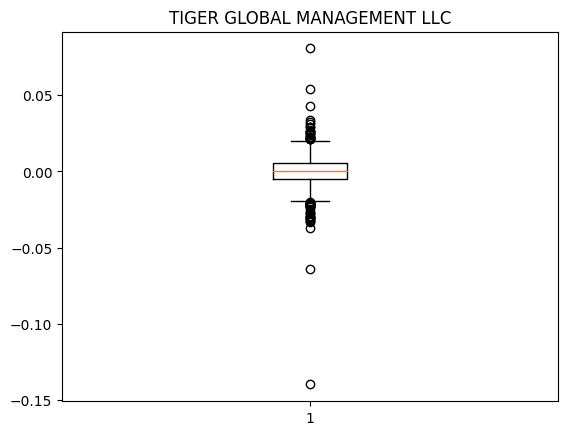

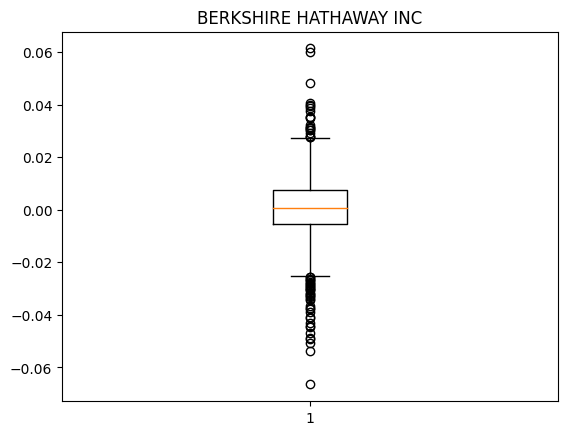

In [18]:
# Box plot to visually show risk
for column in df.columns:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()


### Calculate Standard Deviations

In [19]:
df_std = df.std()
df_std

Algo 1                         0.007623
Algo 2                         0.008346
S&P500                         0.008556
SOROS FUND MANAGEMENT LLC      0.007899
PAULSON & CO.INC.              0.007025
TIGER GLOBAL MANAGEMENT LLC    0.010899
BERKSHIRE HATHAWAY INC         0.012923
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
df['S&P500'].std()


0.008556496721102792

In [21]:
# Determine which portfolios are riskier than the S&P 500
port_std = df[['Algo 1','Algo 2','SOROS FUND MANAGEMENT LLC','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','PAULSON & CO.INC. ','S&P500']].std()
port_std

Algo 1                         0.007623
Algo 2                         0.008346
SOROS FUND MANAGEMENT LLC      0.007899
TIGER GLOBAL MANAGEMENT LLC    0.010899
BERKSHIRE HATHAWAY INC         0.012923
PAULSON & CO.INC.              0.007025
S&P500                         0.008556
dtype: float64

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
Volt= df.std() * np.sqrt(252)
Volt.sort_values(inplace=True)
Volt

PAULSON & CO.INC.              0.111517
Algo 1                         0.121018
SOROS FUND MANAGEMENT LLC      0.125393
Algo 2                         0.132492
S&P500                         0.135830
TIGER GLOBAL MANAGEMENT LLC    0.173019
BERKSHIRE HATHAWAY INC         0.205146
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = df.rolling(window = 21).std()
rolling_std

,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.005760,0.007053,0.006498,0.006711,0.006224,0.007532,0.009731
2019-04-17,0.006229,0.007165,0.006537,0.006773,0.006370,0.007574,0.009485
2019-04-18,0.005834,0.007172,0.006470,0.006633,0.006303,0.007328,0.009475


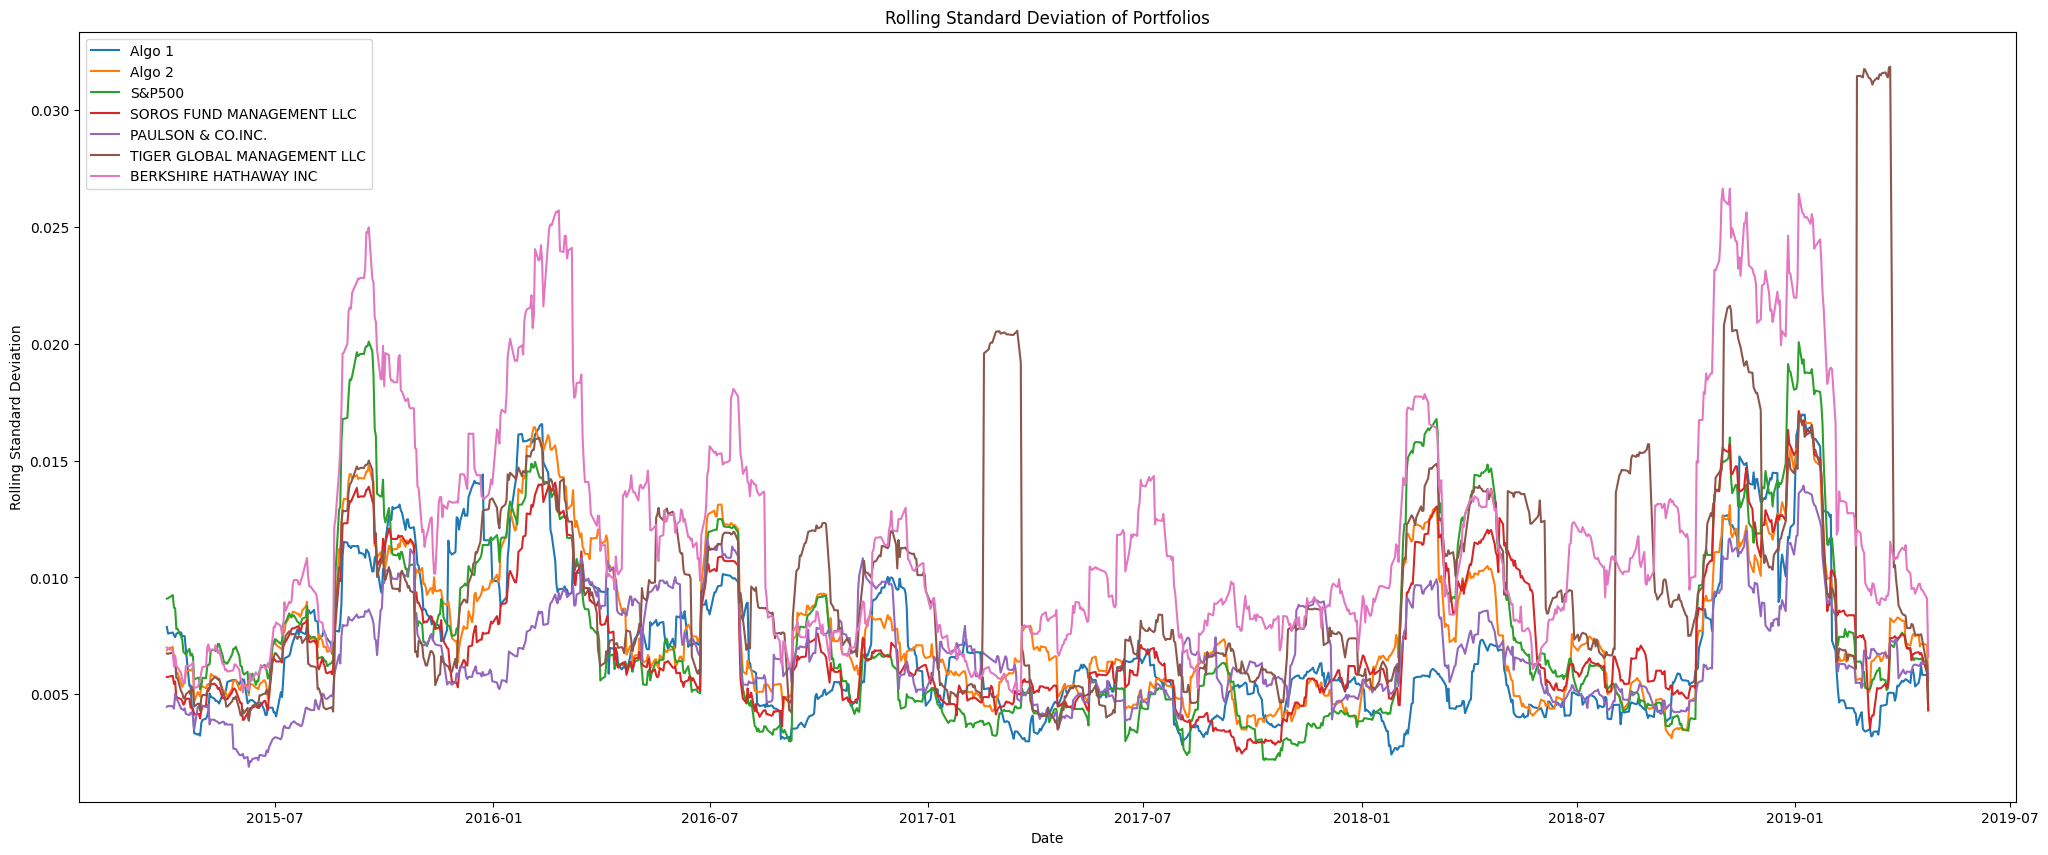

In [24]:
plt.figure(figsize=(25, 10))
for column in rolling_std.columns:
        plt.plot(rolling_std.index, rolling_std[column], label=column)

plt.title('Rolling Standard Deviation of Portfolios')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.show()


### Calculate and plot the correlation

In [25]:
# Calculate the correlation
df_corr = df.corr()
df_corr

,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Algo 1,1.000000,0.288214,0.279366,0.321175,0.268692,0.164384,0.291912
Algo 2,0.288214,1.000000,0.858828,0.826869,0.678214,0.507414,0.688112
S&P500,0.279366,0.858828,1.000000,0.837908,0.669612,0.624023,0.751297
SOROS FUND MANAGEMENT LLC,0.321175,0.826869,0.837908,1.000000,0.699961,0.561246,0.754385
PAULSON & CO.INC.,0.268692,0.678214,0.669612,0.699961,1.000000,0.434551,0.545465
TIGER GLOBAL MANAGEMENT LLC,0.164384,0.507414,0.624023,0.561246,0.434551,1.000000,0.424465
BERKSHIRE HATHAWAY INC,0.291912,0.688112,0.751297,0.754385,0.545465,0.424465,1.000000


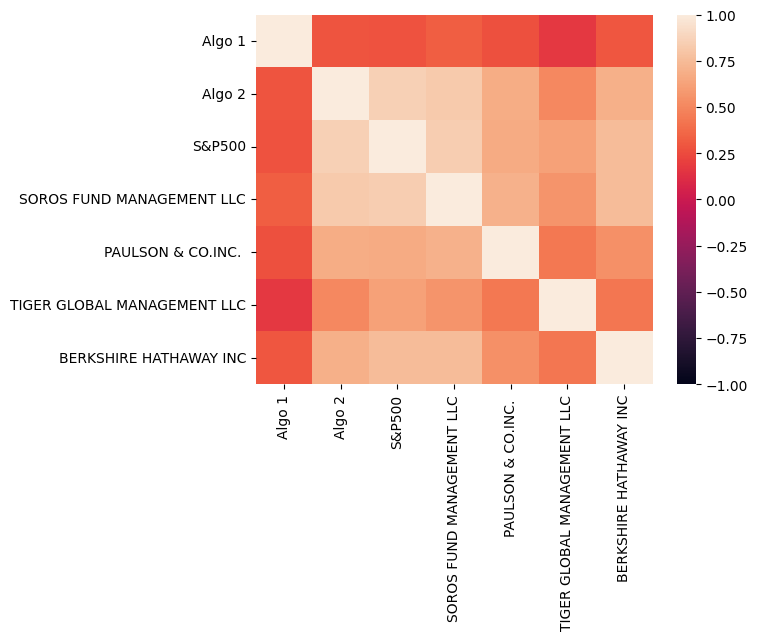

In [26]:
# Display de correlation matrix
sns.heatmap(df_corr, vmax = 1, vmin = -1);

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [27]:
# Calculate covariance of a single portfolio
df_cov = df.cov()['Algo 2']
print(df_cov)

Algo 1                         0.000018
Algo 2                         0.000070
S&P500                         0.000061
SOROS FUND MANAGEMENT LLC      0.000055
PAULSON & CO.INC.              0.000040
TIGER GLOBAL MANAGEMENT LLC    0.000046
BERKSHIRE HATHAWAY INC         0.000074
Name: Algo 2, dtype: float64


In [28]:
# Calculate variance of S&P 500
df_var_sp = df['S&P500'].var()*252
df_var_sp

0.018449836306837195

In [29]:
# Computing beta
df_beta = df_cov / df_var_sp
df_beta

Algo 1                         0.000994
Algo 2                         0.003776
S&P500                         0.003324
SOROS FUND MANAGEMENT LLC      0.002955
PAULSON & CO.INC.              0.002155
TIGER GLOBAL MANAGEMENT LLC    0.002502
BERKSHIRE HATHAWAY INC         0.004023
Name: Algo 2, dtype: float64

In [30]:
df_beta.shape

(7,)

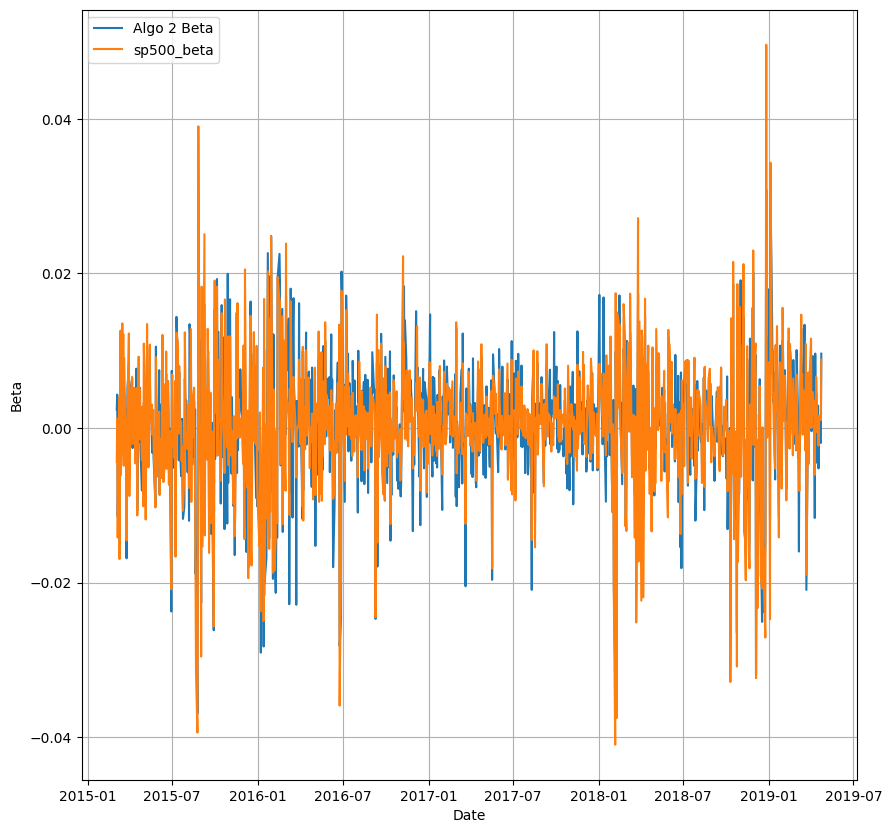

In [127]:
# Plot beta trend
dates = df.index
betas = df['Algo 2']
sp_beta = df['S&P500']

plt.figure(figsize = (10,10))
plt.plot(dates, betas, label = 'Algo 2 Beta')
plt.plot(dates, sp_beta, label = 'sp500_beta')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.legend()
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [32]:
# Use `ewm` to calculate the rolling window
rolling_ewa = df.ewm(span= 21).std()
rolling_ewa

,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,0.005398,0.001348,0.003949,0.001263,0.000590,0.003457,0.001777
2015-03-06,0.003731,0.008836,0.007988,0.006598,0.004304,0.005563,0.011072
2015-03-09,0.002996,0.007250,0.008255,0.005311,0.003814,0.006438,0.008821
2015-03-10,0.003045,0.008101,0.009581,0.006489,0.004746,0.007754,0.008454
...,...,...,...,...,...,...,...
2019-04-16,0.005812,0.006588,0.005294,0.005551,0.005606,0.009747,0.008278
2019-04-17,0.006320,0.006566,0.005171,0.005487,0.005727,0.009415,0.007913
2019-04-18,0.006027,0.006286,0.004932,0.005232,0.005475,0.008978,0.007546


# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
#Annualized Sharpe Ratios
sr = (df.mean()*252)/df.std() * np.sqrt(252)
sr.sort_values(inplace=True, ascending = False)
sr

Algo 1                         348.583469
S&P500                         165.503718
BERKSHIRE HATHAWAY INC         158.745248
Algo 2                         126.842228
SOROS FUND MANAGEMENT LLC       90.476608
TIGER GLOBAL MANAGEMENT LLC    -30.347119
PAULSON & CO.INC.             -119.223125
dtype: float64

In [34]:
print(len(sr.index))
print(len(sr))


7
7


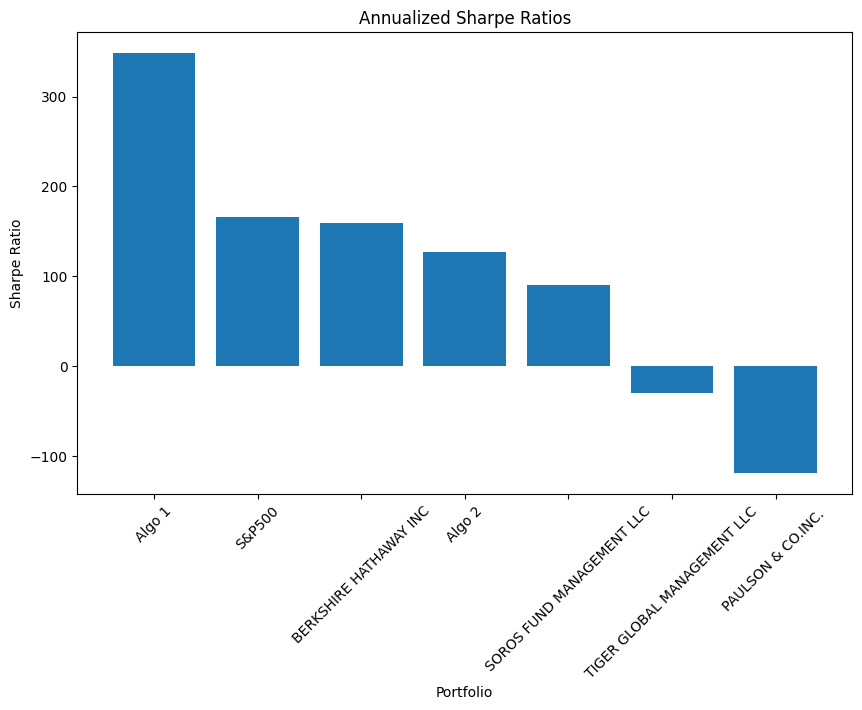

In [35]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sr.index, sr)
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Annualized Sharpe Ratios')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [36]:
# Reading data from 1st stock
algo_df = df['Algo 2'].head(252)
algo_df

Date
2015-03-04    0.002416
2015-03-05    0.004323
2015-03-06   -0.011460
2015-03-09    0.001303
2015-03-10   -0.012155
                ...   
2016-02-25    0.006605
2016-02-26    0.005180
2016-02-29   -0.000851
2016-03-01    0.017115
2016-03-02    0.010729
Name: Algo 2, Length: 252, dtype: float64

In [78]:
# Reading data from 2nd stock
AGO1 = df['Algo 1'].head(252)
SP500

Date
2015-03-04   -0.004389
2015-03-05    0.001196
2015-03-06   -0.014174
2015-03-09    0.003944
2015-03-10   -0.016961
                ...   
2016-02-25    0.011348
2016-02-26   -0.001870
2016-02-29   -0.008121
2016-03-01    0.023869
2016-03-02    0.004094
Name: S&P500, Length: 252, dtype: float64

In [38]:
# Reading data from 3rd stock
bh = df['BERKSHIRE HATHAWAY INC'].head(252)
bh

Date
2015-03-04    0.004213
2015-03-05    0.006726
2015-03-06   -0.013098
2015-03-09   -0.001652
2015-03-10   -0.009739
                ...   
2016-02-25   -0.011997
2016-02-26    0.008685
2016-02-29   -0.001977
2016-03-01    0.030164
2016-03-02    0.000073
Name: BERKSHIRE HATHAWAY INC, Length: 252, dtype: float64

In [84]:
# Combine all stocks in a single DataFrame
cp = pd.concat([bh,AGO1,algo_df], axis = 1, join = 'inner')
cp

,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,
2015-03-04,0.004213,-0.008589,0.002416
2015-03-05,0.006726,-0.000955,0.004323
2015-03-06,-0.013098,-0.004957,-0.011460
2015-03-09,-0.001652,-0.005447,0.001303
2015-03-10,-0.009739,-0.001392,-0.012155
...,...,...,...
2016-02-25,-0.011997,-0.005957,0.006605
2016-02-26,0.008685,0.005786,0.005180
2016-02-29,-0.001977,0.004232,-0.000851


In [85]:
# Reorganize portfolio data by having a column per symbol
cp.rename(columns = {'BERKSHIRE HATHAWAY INC':'BKH','Algo 2':'AGO2','Algo 1':'AGO1'}, inplace=True)
cp.head()

,BKH,AGO1,AGO2
Date,,,
2015-03-04,0.004213,-0.008589,0.002416
2015-03-05,0.006726,-0.000955,0.004323
2015-03-06,-0.013098,-0.004957,-0.011460
2015-03-09,-0.001652,-0.005447,0.001303
2015-03-10,-0.009739,-0.001392,-0.012155


In [86]:
# Calculate daily returns
cp_returns = cp.pct_change()

# Drop NAs
cp_returns.dropna(inplace=True)
# Display sample data
cp_returns.head()

,BKH,AGO1,AGO2
Date,,,
2015-03-05,0.596558,-0.888803,0.789231
2015-03-06,-2.947282,4.190043,-3.650914
2015-03-09,-0.873840,0.098917,-1.113716
2015-03-10,4.893672,-0.744524,-10.327163
2015-03-11,-0.882260,-3.151399,-1.049752


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

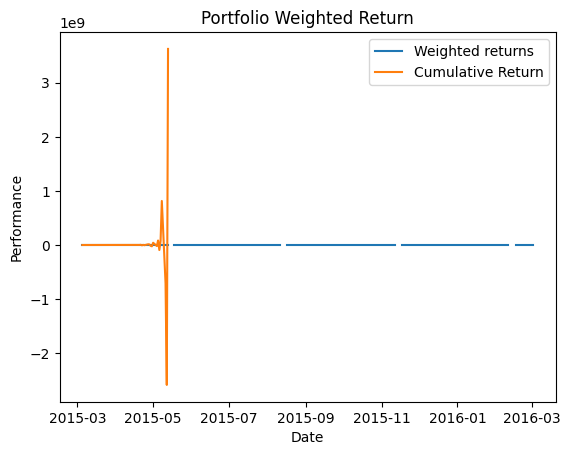

In [87]:
# Set weights
wgt= [.33, .33, .33]

# Calculate portfolio return
opt_returns = cp_returns.dot(wgt)
cumulative_cp_returns = (opt_returns).cumprod()

# Display sample data
plt.plot(opt_returns, label = "Weighted returns")
plt.plot(cumulative_cp_returns, label="Cumulative Return")
plt.title("Portfolio Weighted Return")
plt.xlabel("Date")
plt.ylabel("Performance")
plt.legend()
plt.show()


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([cp_returns, daily_returns], axis = 1, join = 'inner')
all_returns.head(10)

,BKH,AGO1,AGO2,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,,,
2015-03-05,0.596558,-0.888803,0.789231,-0.888803,0.789231,-1.272547,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.947282,4.190043,-3.650914,4.190043,-3.650914,-12.850368,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-0.873840,0.098917,-1.113716,0.098917,-1.113716,-1.278290,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,4.893672,-0.744524,-10.327163,-0.744524,-10.327163,-5.300052,-18.625495,-2.263954,-3.067380,4.893672
2015-03-11,-0.882260,-3.151399,-1.049752,-3.151399,-1.049752,-0.886940,-1.390912,-1.966750,-1.274177,-0.882260
2015-03-12,-10.419761,-1.980244,18.292235,-1.980244,18.292235,-7.571275,1.060018,0.989412,2.960622,-10.419761
2015-03-13,-1.753810,0.847814,-1.433827,0.847814,-1.433827,-1.482062,-1.302164,-1.139064,-1.281865,-1.753810
2015-03-16,-1.989242,-0.373997,-1.813462,-0.373997,-1.813462,-3.227876,-4.163697,-3.508046,-3.151096,-1.989242
2015-03-17,-0.952281,-0.168830,-0.690667,-0.168830,-0.690667,-1.245330,-0.728894,-0.182672,-1.086405,-0.952281


In [89]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isnull().sum()

BKH                            0
AGO1                           0
AGO2                           0
Algo 1                         0
Algo 2                         0
S&P500                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [90]:
# Calculate the annualized `std`
asd = cp.std() * np.sqrt(252)
asd.sort_values(inplace=True)
asd

AGO1    0.153669
AGO2    0.158548
BKH     0.238516
dtype: float64

### Calculate and plot rolling `std` with 21-day window

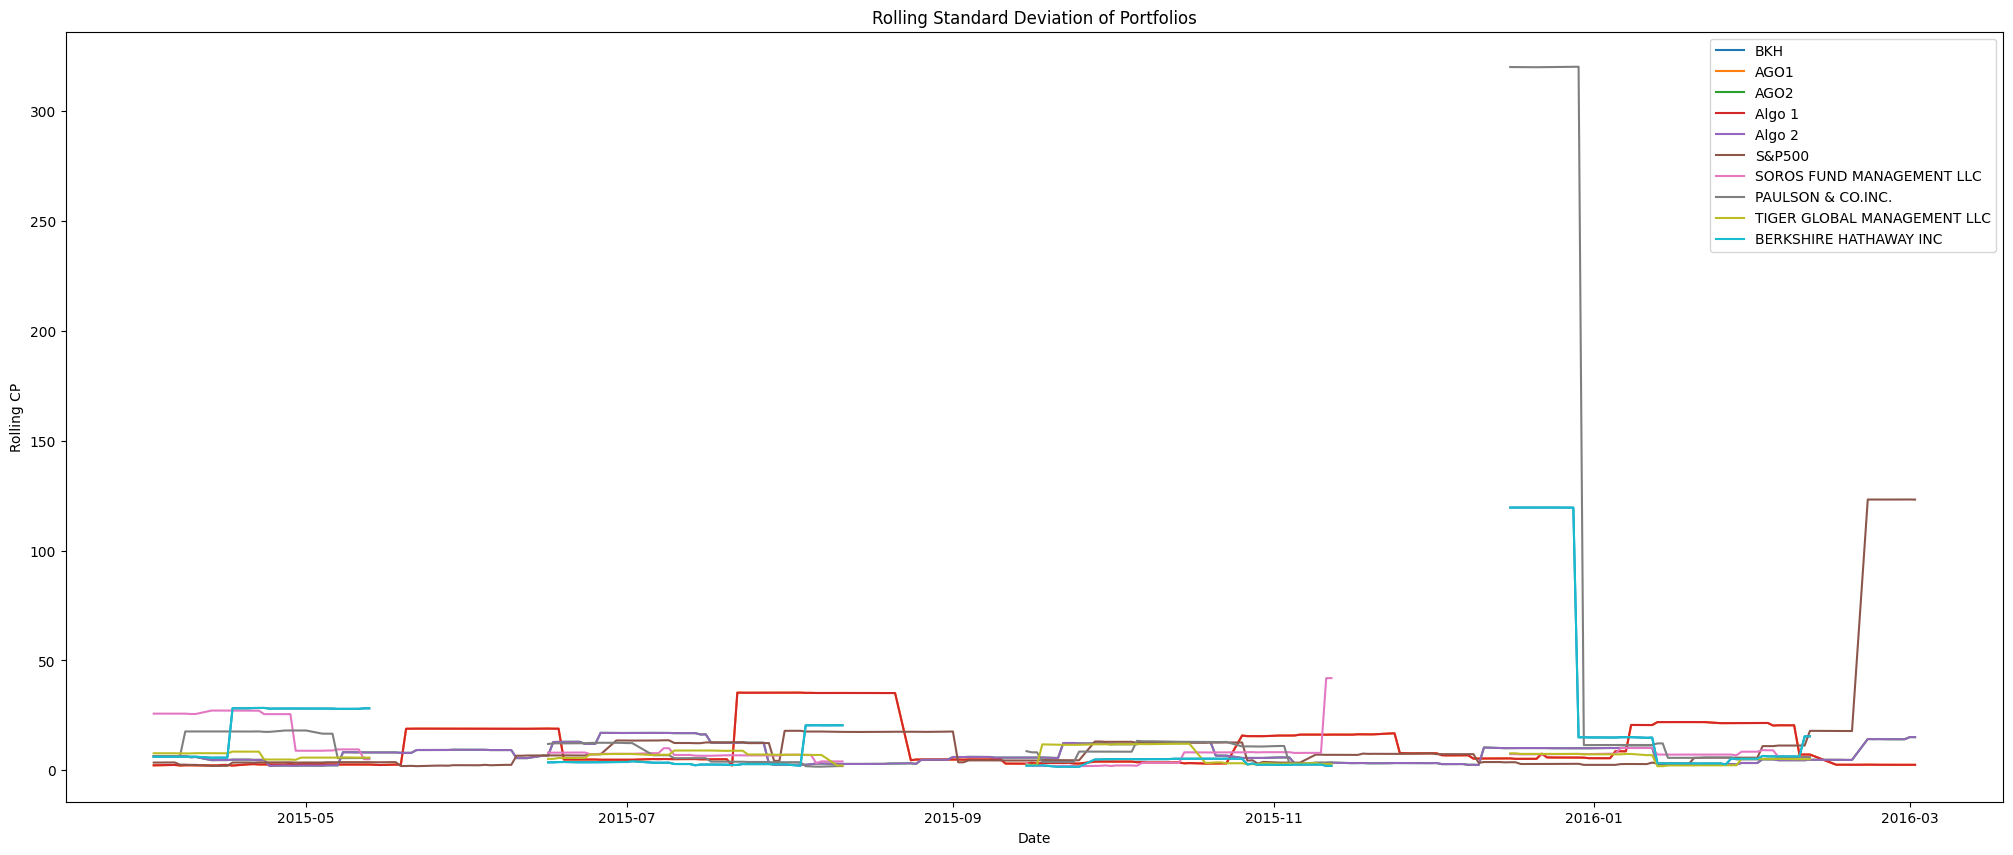

In [91]:
# Calculate rolling standard deviation
rolling_cp = all_returns.rolling(window = 21).std()
# Plot rolling standard deviation
plt.figure(figsize=(25, 10))
for column in rolling_cp.columns:
        plt.plot(rolling_cp.index, rolling_cp[column], label=column)

plt.title('Rolling Standard Deviation of Portfolios')
plt.xlabel('Date')
plt.ylabel('Rolling CP')
plt.legend()
plt.show()


### Calculate and plot the correlation

In [92]:
# Calculate and plot the correlation
all_returns_corr = all_returns.corr()
all_returns_corr

,BKH,AGO1,AGO2,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
BKH,1.000000,-0.013854,-0.015716,-0.013854,-0.015716,-0.030301,-0.019883,0.004221,0.013982,1.000000
AGO1,-0.013854,1.000000,0.019641,1.000000,0.019641,-0.001107,0.018195,0.012391,0.045504,-0.013854
AGO2,-0.015716,0.019641,1.000000,0.019641,1.000000,-0.393045,0.007046,0.012374,0.093358,-0.015716
Algo 1,-0.013854,1.000000,0.019641,1.000000,0.019641,-0.001107,0.018195,0.012391,0.045504,-0.013854
Algo 2,-0.015716,0.019641,1.000000,0.019641,1.000000,-0.393045,0.007046,0.012374,0.093358,-0.015716
S&P500,-0.030301,-0.001107,-0.393045,-0.001107,-0.393045,1.000000,-0.045170,0.014492,0.141674,-0.030301
SOROS FUND MANAGEMENT LLC,-0.019883,0.018195,0.007046,0.018195,0.007046,-0.045170,1.000000,0.018820,0.077258,-0.019883
PAULSON & CO.INC.,0.004221,0.012391,0.012374,0.012391,0.012374,0.014492,0.018820,1.000000,0.092565,0.004221
TIGER GLOBAL MANAGEMENT LLC,0.013982,0.045504,0.093358,0.045504,0.093358,0.141674,0.077258,0.092565,1.000000,0.013982
BERKSHIRE HATHAWAY INC,1.000000,-0.013854,-0.015716,-0.013854,-0.015716,-0.030301,-0.019883,0.004221,0.013982,1.000000


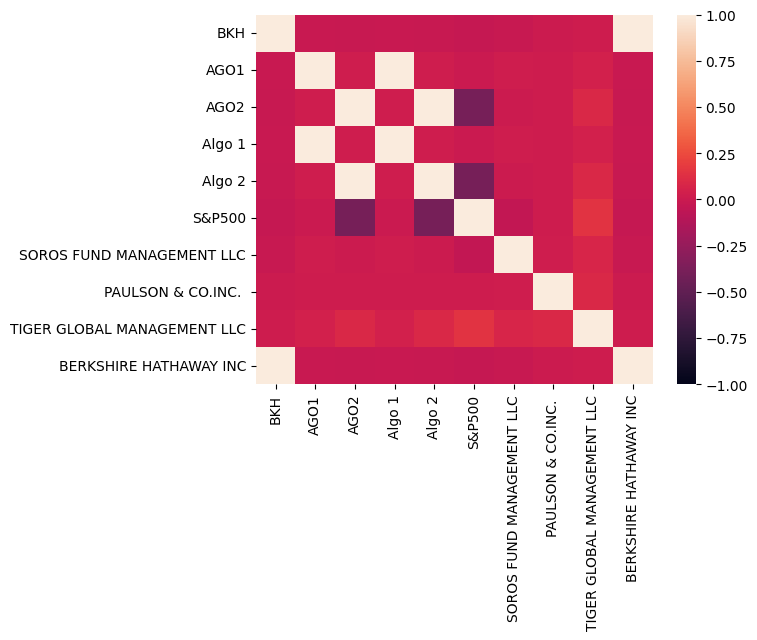

In [93]:
sns.heatmap(all_returns_corr, vmax = 1, vmin = -1);

In [94]:
cp_returns.columns

Index(['BKH', 'AGO1', 'AGO2'], dtype='object')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [107]:
cp_beta = pd.concat([bh,AGO1,algo_df,sp_return], axis = 1, join = 'inner')
cp_beta.head()

,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,
2015-03-04,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.009739,-0.001392,-0.012155,-0.016961


In [130]:
cp["portfolio"] = cp.mean(axis=1)
cp['portfolio']

Date
2015-03-04   -0.000653
2015-03-05    0.003365
2015-03-06   -0.009838
2015-03-09   -0.001932
2015-03-10   -0.007762
                ...   
2016-02-25   -0.003783
2016-02-26    0.006550
2016-02-29    0.000468
2016-03-01    0.014004
2016-03-02    0.003689
Name: portfolio, Length: 252, dtype: float64

In [131]:
# Calculate and plot Beta
covar = cp_beta['portfolio'].cov(cp_beta["S&P500"])
#Calculate variance
Var = cp_beta["S&P500"].var()
#Calculate Beta
portfolio_beta = covar / Var
portfolio_beta


0.7292130452177249

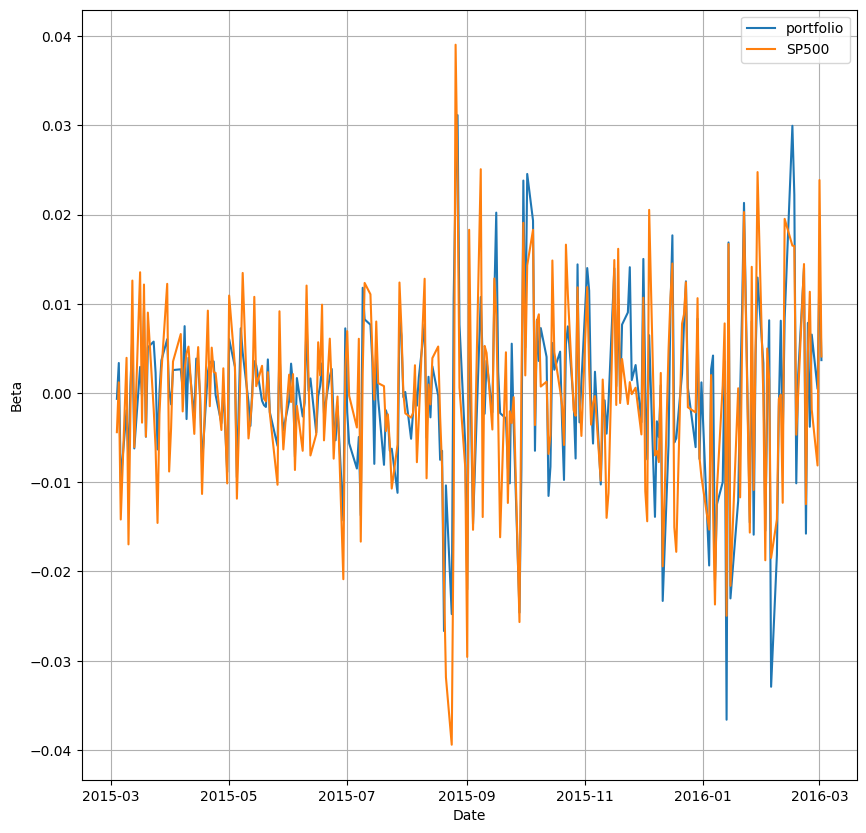

In [134]:
# Plot beta trend
dates = cp.index
betas = cp['portfolio']
sp_beta = cp_beta['S&P500']

plt.figure(figsize = (10,10))
plt.plot(dates, betas, label = 'portfolio')
plt.plot(dates, sp_beta, label = 'SP500')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.legend()
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [141]:
# Calculate Annualized Sharpe Ratios
cp_sr = (cp.mean()*252)/cp.std() * np.sqrt(252)
cp_sr.sort_values(inplace=True, ascending = False)
cp_sr

AGO1         454.170543
portfolio     25.280648
BKH         -115.763421
AGO2        -193.305376
dtype: float64

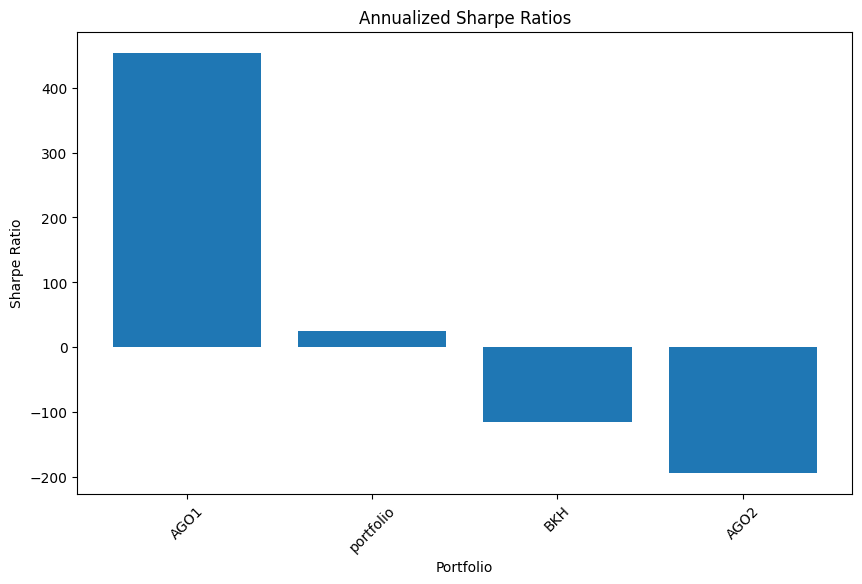

In [142]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cp_sr.index, cp_sr)
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Annualized Sharpe Ratios')
plt.xticks(rotation=45)
plt.plot();  # Rotate x-axis la

### How does your portfolio do?

Write your answer here!